# Importing Libraries

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import os 
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.metrics import r2_score, confusion_matrix, recall_score, precision_score, roc_auc_score, f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, PolynomialFeatures, StandardScaler

In [2]:
df = pd.read_csv('new_df.csv')

In [3]:
# Assigning songs with 'plays' more than or equal to 40 as liked (1)
df['Label'] = 0
df['Label'][df[df['plays'] >= 40].index] = 1

In [4]:
df.columns

Index(['artist_name', 'track_name', 'track_id', 'genre', 'year', 'plays',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'Label'],
      dtype='object')

# Feature Engineering (and EDA)

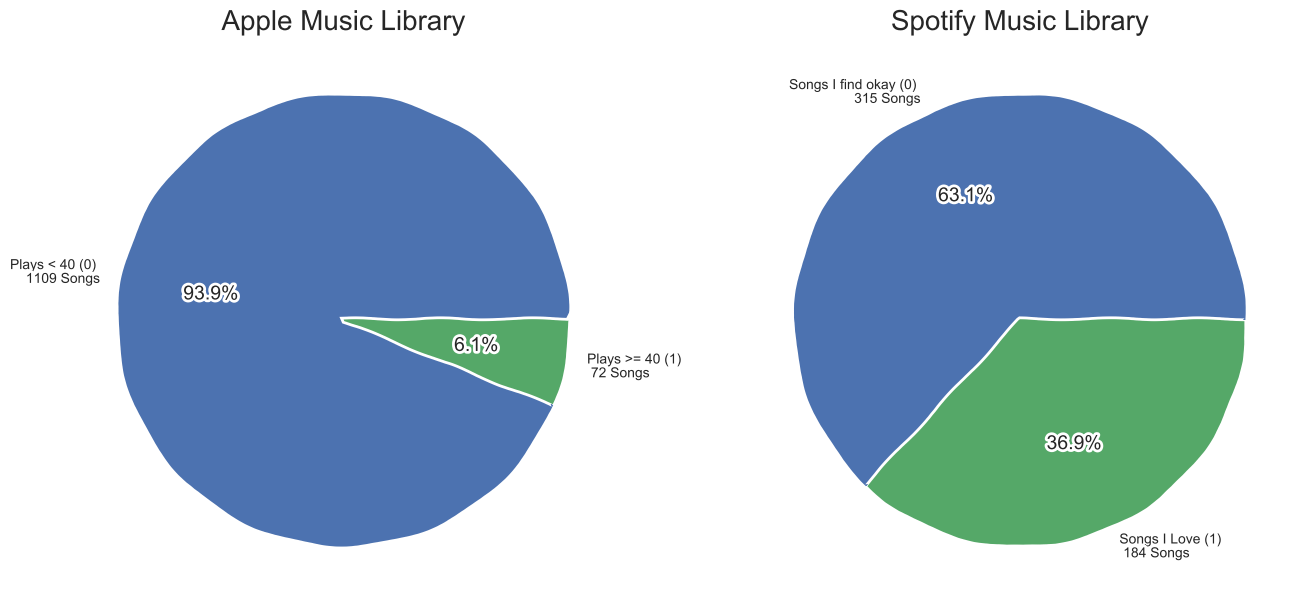

In [57]:
# Checking the distribution of Labels
plt.xkcd()
plt.style.use('seaborn')

fig, ax = plt.subplots(1,2,figsize = (16,8))
#sns.barplot(x = df.Label.value_counts().index, y = df.Label.value_counts().values, palette = 'RdBu')

ax[0].pie(df.Label.value_counts(), labels = ['Plays < 40 (0) \n 1109 Songs','Plays >= 40 (1) \n 72 Songs'],
          autopct = '%1.1f%%')
ax[1].pie(spotify_df_label.Label.value_counts(), 
          labels = ['Songs I find okay (0) \n 315 Songs','Songs I Love (1) \n 184 Songs'], autopct = '%1.1f%%' )
#plt.xlabel('Class')
#plt.ylabel('No. of Songs')
ax[0].set_title('Apple Music Library', size = 20)
ax[1].set_title('Spotify Music Library', size = 20)
plt.show()

In [6]:
df.Label.value_counts()

0    1109
1      72
Name: Label, dtype: int64

In [7]:
# Dropping not-needed columns
df.drop(['artist_name','track_name','year','plays','genre'],1, inplace = True)

In [8]:
# Setting track_id as index
df.set_index('track_id', inplace = True)

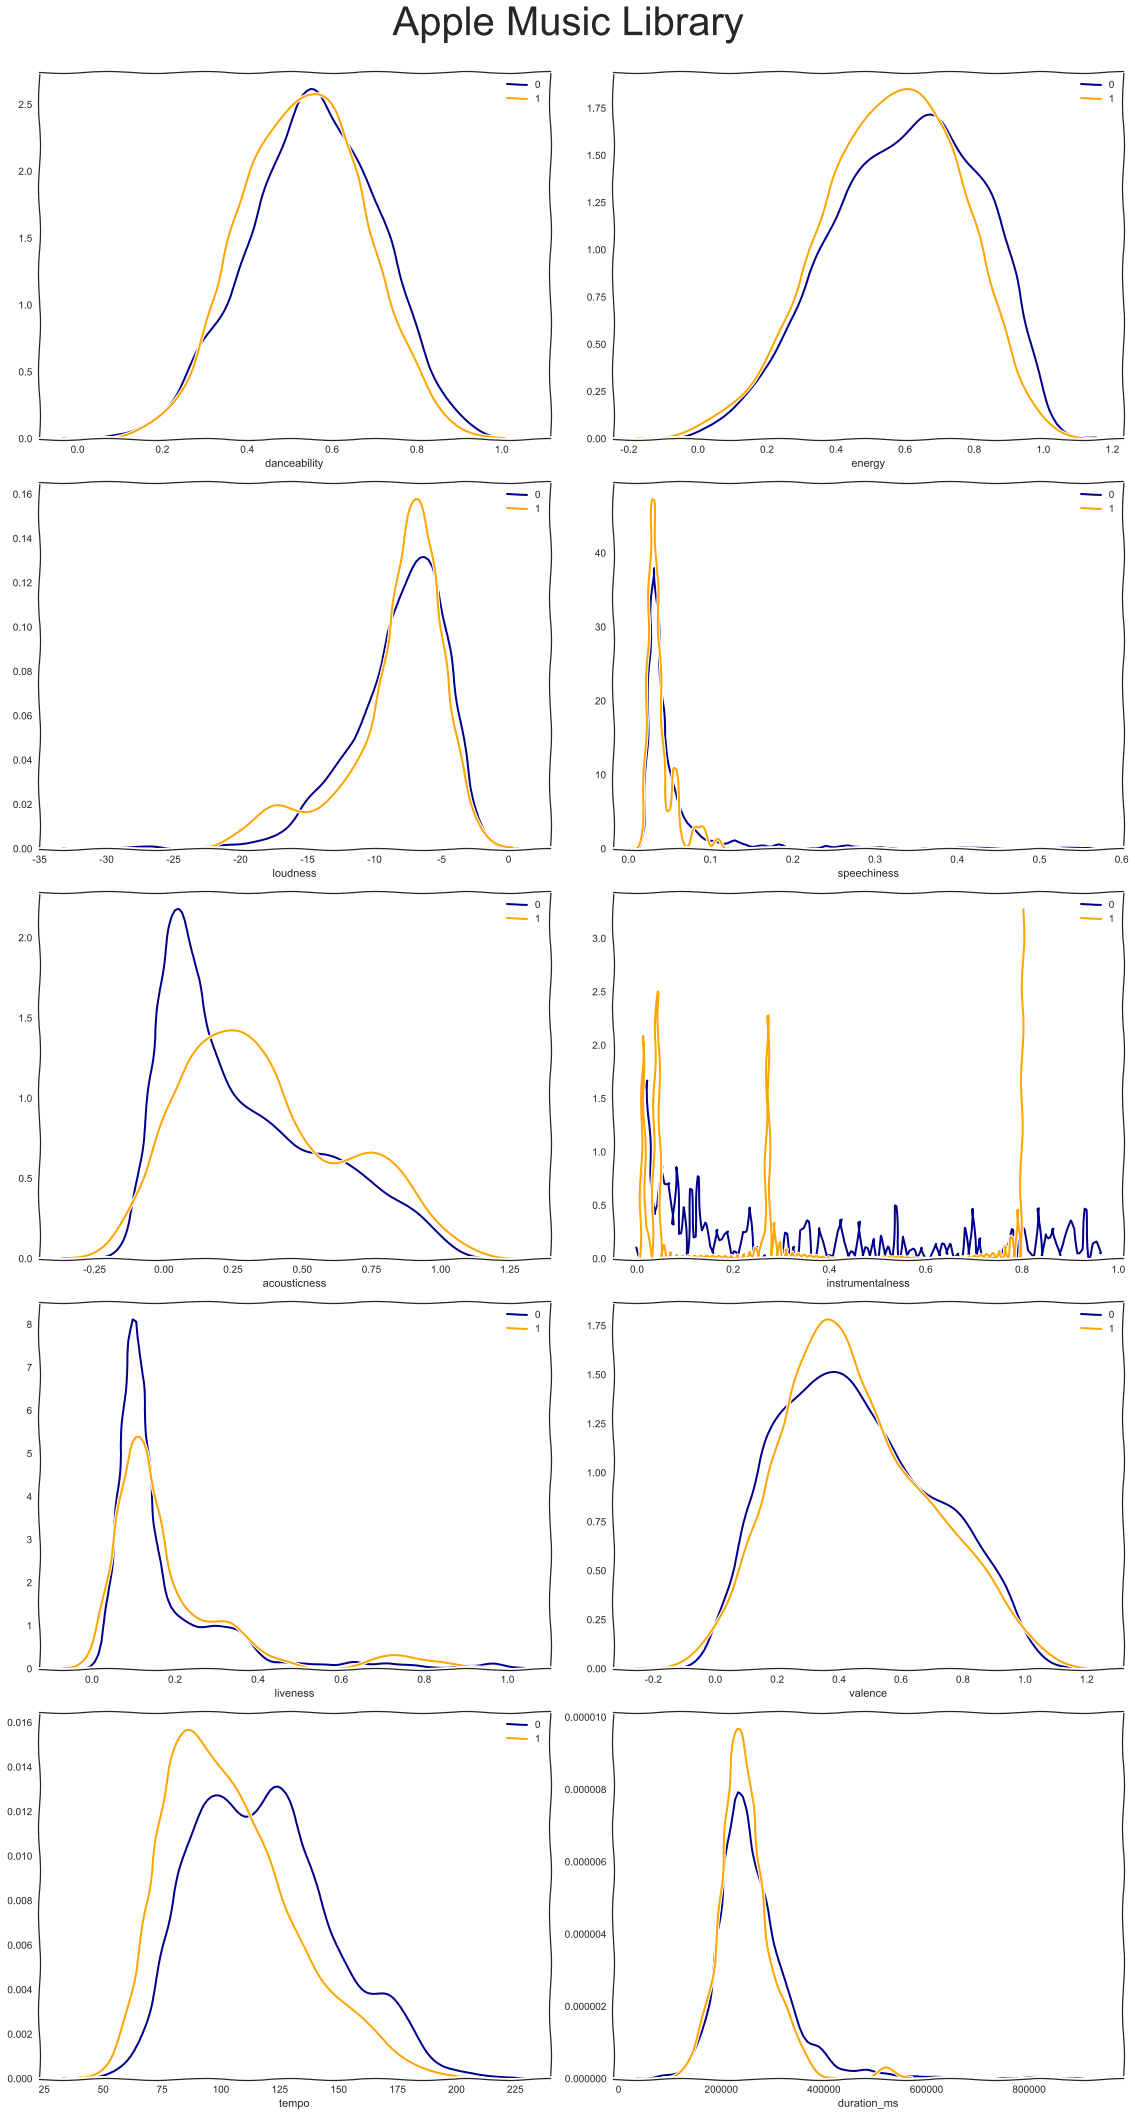

In [9]:
# Density distribution for features for each of the binary label.

plt.xkcd()
plt.style.use('seaborn-white')
fig, ax = plt.subplots(5,2,figsize = (16, 30))

fig.suptitle('Apple Music Library',size = 40)

i,j = 0,0

for column,i,j in [('danceability',0,0),('energy',0,1), ('loudness',1,0), ('speechiness',1,1),
       ('acousticness',2,0), ('instrumentalness',2,1), ('liveness',3,0), ('valence',3,1), ('tempo',4,0),
       ('duration_ms',4,1)]:
    
    a = sns.distplot(df[df.Label == 0].loc[:,column], hist = False, label = '0', ax = ax[i,j], color = 'darkblue')
    b = sns.distplot(df[df.Label == 1].loc[:,column], hist = False, label = '1', ax = ax[i,j], color = 'orange')
    plt.legend([a,b],['0','1'])

fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.savefig('kde plots.JPEG')

In [10]:
df.rename(columns = {'danceability':'dance', 'speechiness': 'speech', 'instrumentalness':'instrument',
                    'time_signature': 'time_sig'}).head()

dance  energy  key  loudness  mode  speech  \
track_id                                                             
08kTa3SL9sV6Iy8KLKtGql  0.558   0.497    8    -7.175     1  0.0256   
0AfVDxWlOZxto1gccmPB2f  0.690   0.266    8    -9.693     1  0.0263   
4QEytRwdtpdbexU2ZFVZbj  0.393   0.320    8    -8.648     1  0.0301   
73y649QhnXdcm6fRdvfraO  0.334   0.387    2    -9.483     1  0.0332   
1vgVsR5rkXGP4NmUcoroJH  0.656   0.762    9    -6.328     1  0.0315   

                        acousticness  instrument  liveness  valence    tempo  \
track_id                                                                       
08kTa3SL9sV6Iy8KLKtGql        0.0285    0.000005    0.0799    0.444  107.047   
0AfVDxWlOZxto1gccmPB2f        0.9280    0.009570    0.1120    0.455  102.025   
4QEytRwdtpdbexU2ZFVZbj        0.8570    0.000011    0.0917    0.456  135.029   
73y649QhnXdcm6fRdvfraO        0.7550    0.000039    0.1130    0.420  129.959   
1vgVsR5rkXGP4NmUcoroJH        0.5490    0.000000    0.1390    0.558  110.002   

                        duration_ms  time_sig  Label  
track_id                                              
08kTa3SL9sV6Iy8KLKtGql       197549         4      0  
0AfVDxWlOZxto1gccmPB2f       237696         4      0  
4QEytRwdtpdbexU2ZFVZbj       240953         3      0  
73y649QhnXdcm6fRdvfraO       364787         1      0  
1vgVsR5rkXGP4NmUcoroJH       280497         4      0

In [11]:
# Normalising 'duration_ms'
scaler = StandardScaler()
df['duration_ms'] = scaler.fit_transform(df[['duration_ms']])
df['tempo'] = scaler.fit_transform(df[['tempo']])
#df['loudness'] = scaler.fit_transform(df[['loudness']])
#df['speechiness'] = scaler.fit_transform(df[['speechiness']])
#df['acousticness'] = scaler.fit_transform(df[['acousticness']])
#df['instrumentalness'] = scaler.fit_transform(df[['instrumentalness']])
#df['liveness'] = scaler.fit_transform(df[['liveness']])

In [12]:
df.rename(columns = {'danceability':'dance', 'speechiness': 'speech', 'instrumentalness':'instrument',
                    'time_signature': 'time_sig'}).head()

dance  energy  key  loudness  mode  speech  \
track_id                                                             
08kTa3SL9sV6Iy8KLKtGql  0.558   0.497    8    -7.175     1  0.0256   
0AfVDxWlOZxto1gccmPB2f  0.690   0.266    8    -9.693     1  0.0263   
4QEytRwdtpdbexU2ZFVZbj  0.393   0.320    8    -8.648     1  0.0301   
73y649QhnXdcm6fRdvfraO  0.334   0.387    2    -9.483     1  0.0332   
1vgVsR5rkXGP4NmUcoroJH  0.656   0.762    9    -6.328     1  0.0315   

                        acousticness  instrument  liveness  valence     tempo  \
track_id                                                                        
08kTa3SL9sV6Iy8KLKtGql        0.0285    0.000005    0.0799    0.444 -0.366798   
0AfVDxWlOZxto1gccmPB2f        0.9280    0.009570    0.1120    0.455 -0.544967   
4QEytRwdtpdbexU2ZFVZbj        0.8570    0.000011    0.0917    0.456  0.625940   
73y649QhnXdcm6fRdvfraO        0.7550    0.000039    0.1130    0.420  0.446068   
1vgVsR5rkXGP4NmUcoroJH        0.5490    0.000000    0.1390    0.558 -0.261961   

                        duration_ms  time_sig  Label  
track_id                                              
08kTa3SL9sV6Iy8KLKtGql    -0.892948         4      0  
0AfVDxWlOZxto1gccmPB2f    -0.354823         4      0  
4QEytRwdtpdbexU2ZFVZbj    -0.311167         3      0  
73y649QhnXdcm6fRdvfraO     1.348689         1      0  
1vgVsR5rkXGP4NmUcoroJH     0.218876         4      0

22.18829107284546


<Figure size 2160x2160 with 0 Axes>

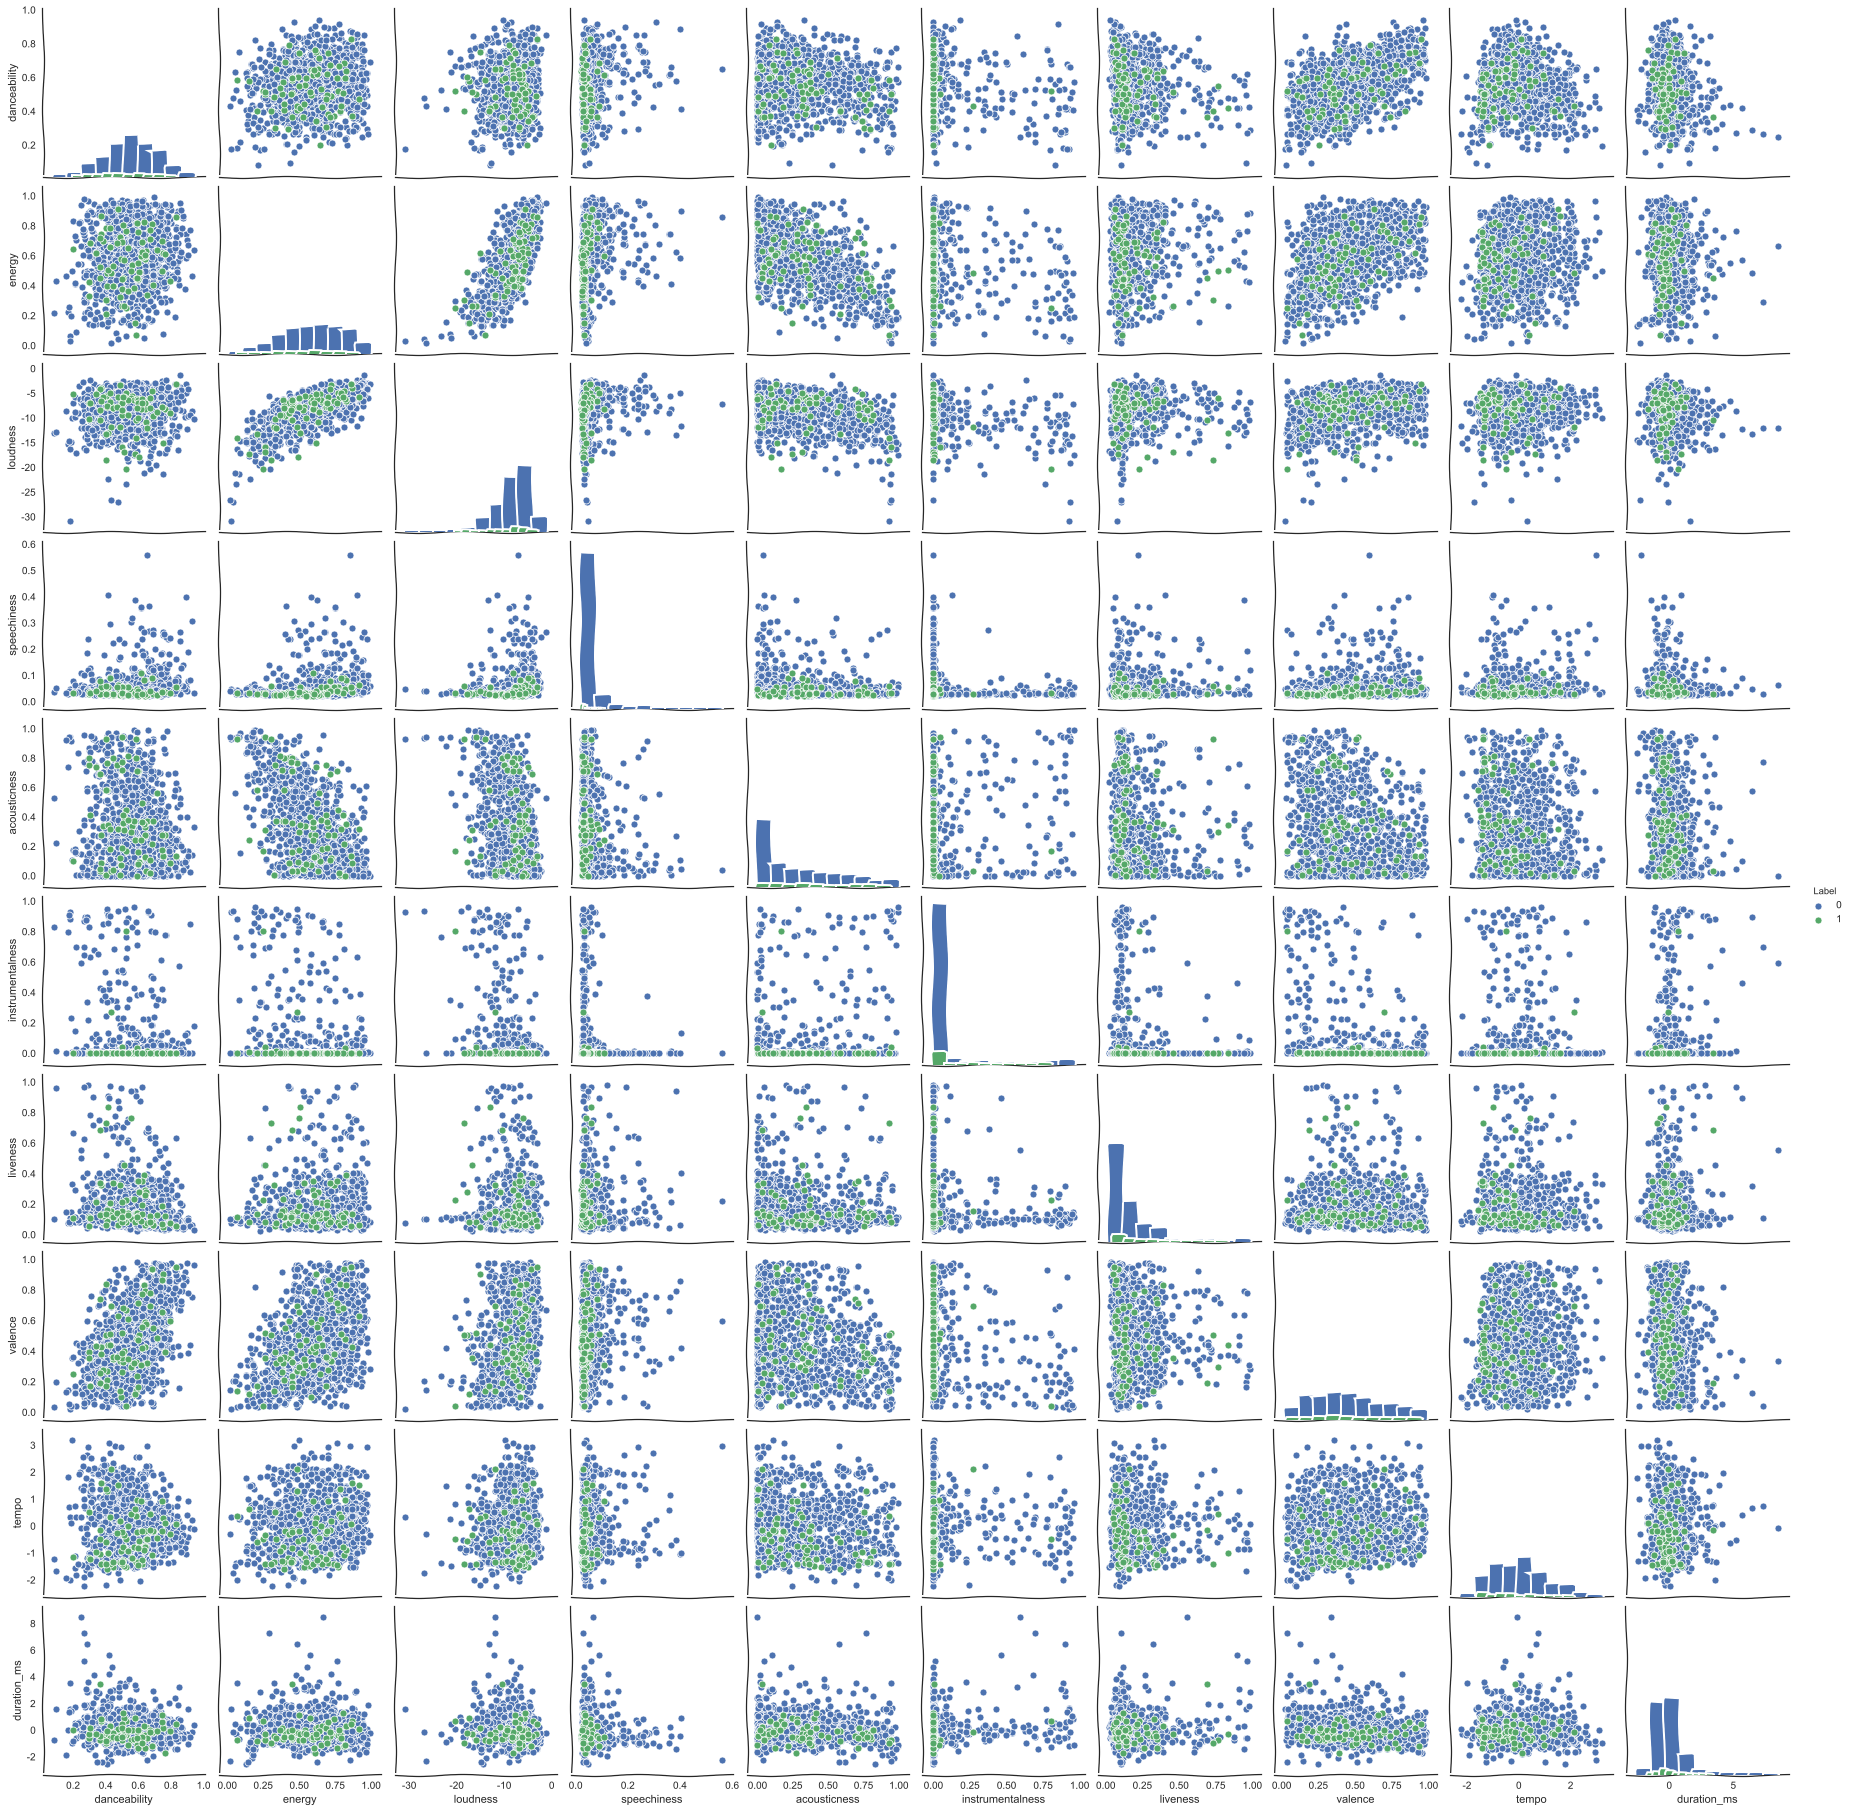

In [13]:
# Pairplot between continous features
t0 = time.time()
plt.figure(figsize = (30,30))
sns.pairplot(df[['danceability','energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms','Label']], hue = 'Label', diag_kind = 'hist' )
#sns.pairplot(df[['loudness','acousticness','Label']], hue = 'Label', diag_kind = 'hist')
t1 = time.time()
print(t1-t0)

# Model Building

## 1. Imbalanced Data

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [15]:
# Assigning Feature and Label datasets
X = df.drop('Label',1)
y = df['Label']

# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2, stratify = y)


In [16]:
# Intiating dataframe to record metric for different classifiers
performance_apple = pd.DataFrame(columns = ['Sampling Type', 'Classifier','Accuracy','Confusion Matrix','Precision','Recall',
                                            'F1 Score','ROC AUC Score'])

In [17]:
performance_apple['Classifier'] = ['LogReg','SVC','KNN','Random Forest','GaussianNB','XGBClassifier']*2
performance_apple['Sampling Type'] = ['Original']*6 + ['SMOTE']*6

In [18]:
# Running different classifiers and compiling into 'performance_apple'

models = [LogisticRegression(random_state = 0), SVC(random_state = 0), KNeighborsClassifier(),
          RandomForestClassifier(random_state = 1),GaussianNB(), XGBClassifier(random_state = 0)]
i = 0
for model in models:
    clf = model
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    performance_apple.loc[i,'Accuracy'] = accuracy_score(y_test, pred)
    performance_apple.loc[i,'Confusion Matrix'] = confusion_matrix(y_test, pred)
    performance_apple.loc[i,'Precision'] = precision_score(y_test, pred)
    performance_apple.loc[i,'Recall'] = recall_score(y_test, pred)
    performance_apple.loc[i,'F1 Score'] = f1_score(y_test, pred)
    performance_apple.loc[i,'ROC AUC Score'] = roc_auc_score(y_test, pred)
    
    i = i + 1

In [19]:
performance_apple

Sampling Type     Classifier  Accuracy      Confusion Matrix  Precision  \
0       Original         LogReg  0.940928   [[223, 0], [14, 0]]          0   
1       Original            SVC  0.940928   [[223, 0], [14, 0]]          0   
2       Original            KNN  0.940928   [[222, 1], [13, 1]]        0.5   
3       Original  Random Forest  0.940928   [[223, 0], [14, 0]]          0   
4       Original     GaussianNB  0.852321  [[201, 22], [13, 1]]  0.0434783   
5       Original  XGBClassifier  0.936709   [[222, 1], [14, 0]]          0   
6          SMOTE         LogReg       NaN                   NaN        NaN   
7          SMOTE            SVC       NaN                   NaN        NaN   
8          SMOTE            KNN       NaN                   NaN        NaN   
9          SMOTE  Random Forest       NaN                   NaN        NaN   
10         SMOTE     GaussianNB       NaN                   NaN        NaN   
11         SMOTE  XGBClassifier       NaN                   NaN        NaN   

       Recall   F1 Score ROC AUC Score  
0           0          0           0.5  
1           0          0           0.5  
2   0.0714286      0.125      0.533472  
3           0          0           0.5  
4   0.0714286  0.0540541      0.486387  
5           0          0      0.497758  
6         NaN        NaN           NaN  
7         NaN        NaN           NaN  
8         NaN        NaN           NaN  
9         NaN        NaN           NaN  
10        NaN        NaN           NaN  
11        NaN        NaN           NaN

## 2. Balanced Data - SMOTE 

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
smote = SMOTE(random_state = 4)

# generating sample balanced dataset
X_sample, y_sample = smote.fit_sample(X_train, y_train)

In [22]:
X_sample.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.720   0.668    9    -7.928     1       0.0269        0.0652   
1         0.579   0.578    3    -5.361     1       0.0283        0.0304   
2         0.625   0.758    5    -6.213     0       0.0463        0.5120   
3         0.550   0.578   11    -7.973     0       0.0273        0.0876   
4         0.575   0.318    0   -16.729     1       0.1090        0.6830   

   instrumentalness  liveness  valence     tempo  duration_ms  time_signature  
0          0.006640    0.0789    0.768  0.199427     0.212576               4  
1          0.000229    0.1000    0.356 -1.376671    -0.907907               4  
2          0.000220    0.1530    0.695  0.082776    -0.173107               4  
3          0.000008    0.0757    0.364 -1.207655    -0.117159               4  
4          0.000202    0.0934    0.385 -0.456379    -0.133967               4

In [23]:
# Running different classifiers on SMOTE dataset and compiling into 'performance_apple'

i = 6
for model in models:
    clf = model
    clf.fit(X_sample, y_sample)
    pred = clf.predict(X_test)
    performance_apple.loc[i,'Accuracy'] = accuracy_score(y_test, pred)
    performance_apple.loc[i,'Confusion Matrix'] = confusion_matrix(y_test, pred)
    performance_apple.loc[i,'Precision'] = precision_score(y_test, pred)
    performance_apple.loc[i,'Recall'] = recall_score(y_test, pred)
    performance_apple.loc[i,'F1 Score'] = f1_score(y_test, pred)
    performance_apple.loc[i,'ROC AUC Score'] = roc_auc_score(y_test, pred)
    
    i = i + 1

In [24]:
performance_apple

Sampling Type     Classifier  Accuracy      Confusion Matrix  Precision  \
0       Original         LogReg  0.940928   [[223, 0], [14, 0]]          0   
1       Original            SVC  0.940928   [[223, 0], [14, 0]]          0   
2       Original            KNN  0.940928   [[222, 1], [13, 1]]        0.5   
3       Original  Random Forest  0.940928   [[223, 0], [14, 0]]          0   
4       Original     GaussianNB  0.852321  [[201, 22], [13, 1]]  0.0434783   
5       Original  XGBClassifier  0.936709   [[222, 1], [14, 0]]          0   
6          SMOTE         LogReg  0.628692  [[139, 84], [4, 10]]   0.106383   
7          SMOTE            SVC  0.628692  [[139, 84], [4, 10]]   0.106383   
8          SMOTE            KNN  0.637131   [[146, 77], [9, 5]]  0.0609756   
9          SMOTE  Random Forest  0.907173  [[211, 12], [10, 4]]       0.25   
10         SMOTE     GaussianNB  0.455696  [[98, 125], [4, 10]]  0.0740741   
11         SMOTE  XGBClassifier  0.881857  [[205, 18], [10, 4]]   0.181818   

       Recall   F1 Score ROC AUC Score  
0           0          0           0.5  
1           0          0           0.5  
2   0.0714286      0.125      0.533472  
3           0          0           0.5  
4   0.0714286  0.0540541      0.486387  
5           0          0      0.497758  
6    0.714286   0.185185      0.668802  
7    0.714286   0.185185      0.668802  
8    0.357143   0.104167      0.505926  
9    0.285714   0.266667      0.615951  
10   0.714286   0.134228      0.576874  
11   0.285714   0.222222      0.602498

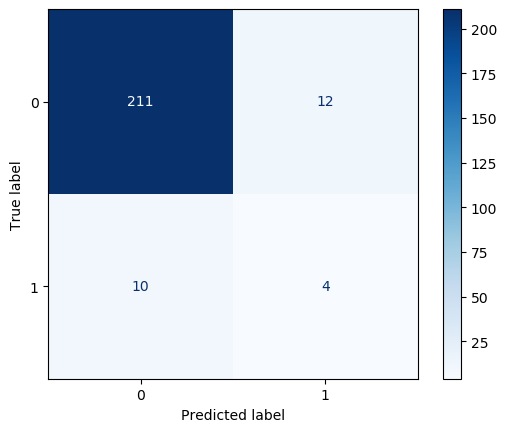

In [25]:
# Confusion Matrix for Random Forest Classifier

plt.rcdefaults()
clf_rfc = RandomForestClassifier(random_state = 1)
clf_rfc.fit(X_sample, y_sample)

plot_confusion_matrix(clf_rfc, X_test, y_test, cmap=plt.cm.Blues)
#plt.title('Apple Dataset', pad = 15, size = 15)

plt.savefig('cm_rfc_apple.JPEG')

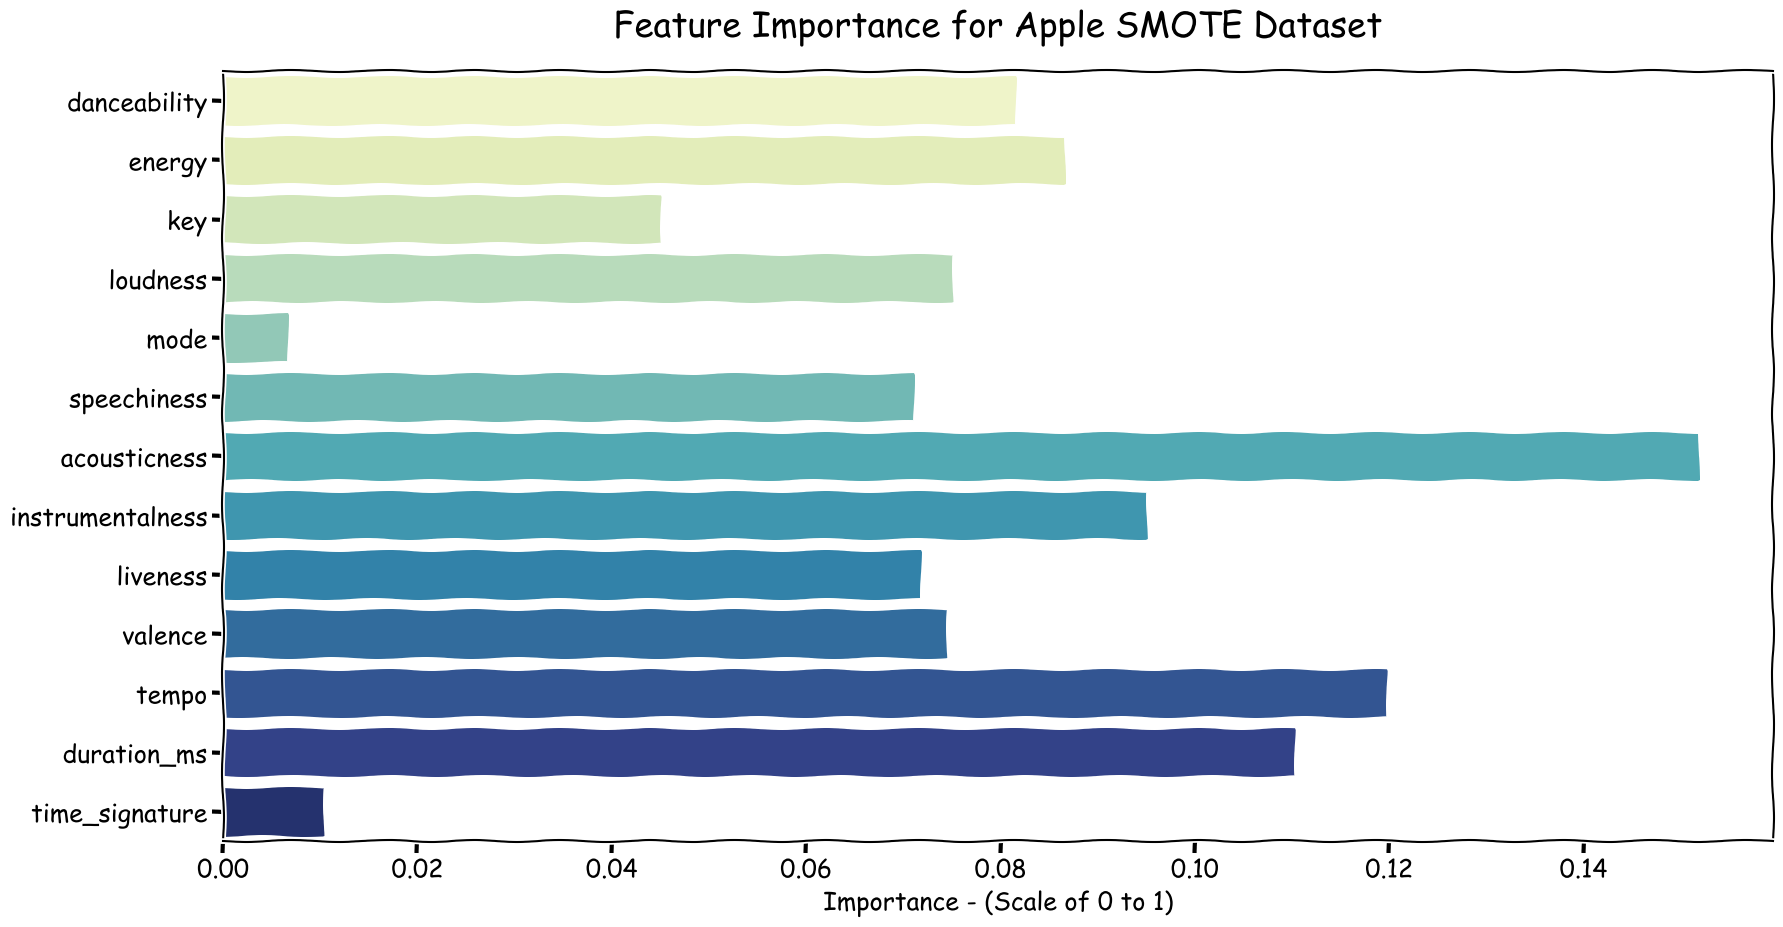

In [26]:
# Feature Importance 

plt.xkcd()
clf = RandomForestClassifier(random_state = 1)
clf.fit(X_sample, y_sample)

plt.figure(figsize = (20,10))
sns.barplot(y = X_train.columns, x = clf.feature_importances_, palette = 'YlGnBu')
plt.xlabel('Importance - (Scale of 0 to 1)', size = 18)
plt.title('Feature Importance for Apple SMOTE Dataset', pad = 25,size = 25)
plt.yticks(size = 18)
plt.xticks(size = 18)
plt.savefig('feature importance.JPEG')

In [27]:
# Intiating dataframe to record threshold data for different classifiers

performance_apple_threshold = pd.DataFrame(columns = ['Classifier','Best Threshold', 'Confusion Matrix',
                                                      'Precision Score', 'F1 Score', 'ROC AUC Score'])

performance_apple_threshold['Classifier'] = ['LogReg','KNN','Random Forest','XGBoost']

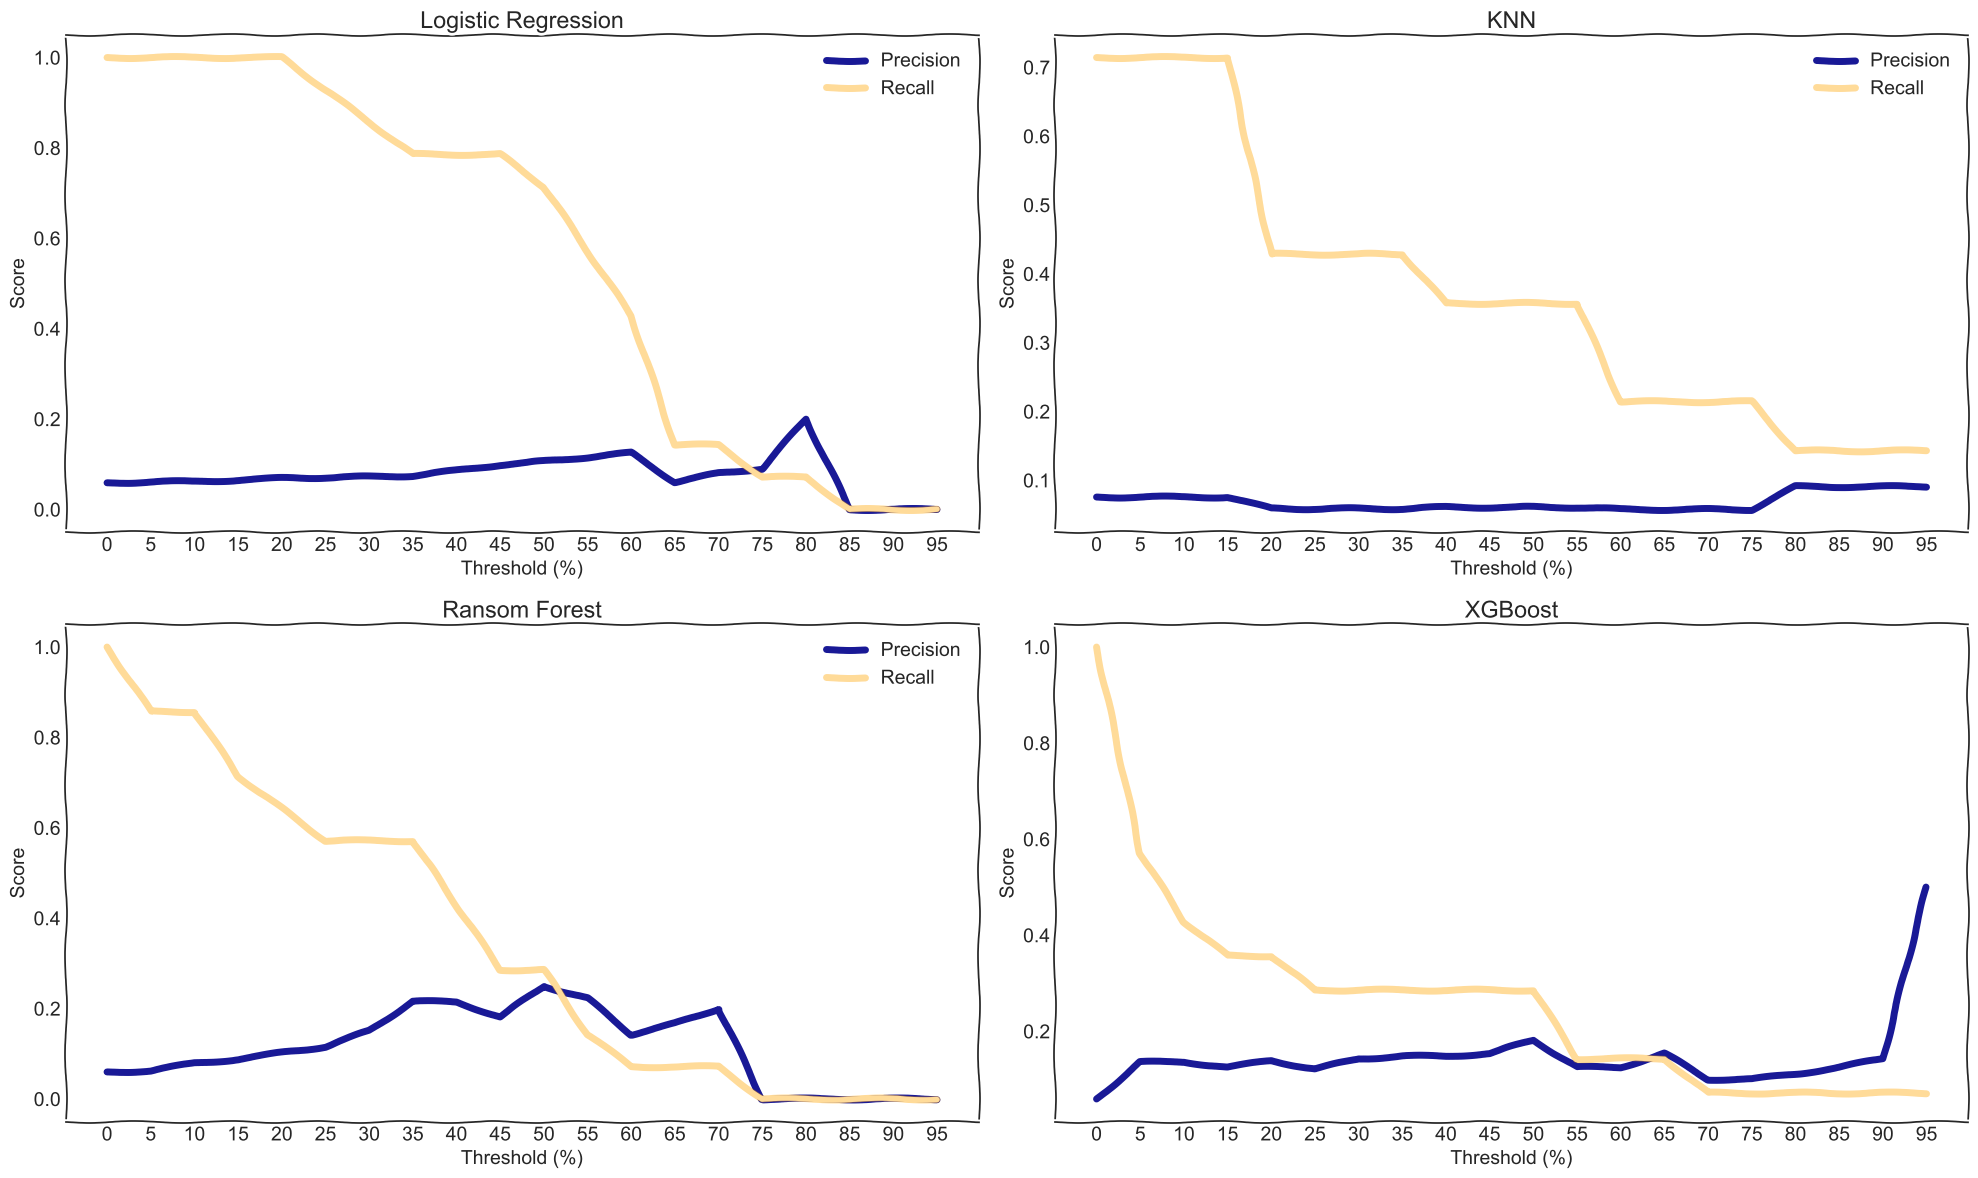

In [28]:
# 1. Plotting precision and recall for different thresholds for different classifiers
# 2. Compiling all the into into 'performance_apple_threshold'

plt.xkcd()
plt.style.use('seaborn-white')

i = 0

fig, ax = plt.subplots(2,2,figsize = (20,12))

for (model,ax1,ax2) in [ (LogisticRegression(random_state = 0),0,0), (KNeighborsClassifier(),0,1), 
              (RandomForestClassifier(random_state = 1),1,0), (XGBClassifier(random_state = 0),1,1)]:
    
    model_names = ['Logistic Regression', 'KNN', 'Ransom Forest', 'XGBoost']
    
    clf = model
    clf.fit(X_sample, y_sample)
    
    pred_proba_smote = clf.predict_proba(X_test)

    best_precision = precision_score(y_test, clf.predict(X_test))
    best_threshold = 0.5
    
    precision_list = []
    recall_list = []
    
    for threshold in (np.array(range(0, 100, 5))/100):
        precision = precision_score(y_test, (pred_proba_smote[:,1] > threshold).astype(int))
        precision_list.append(precision)
        recall_list.append(recall_score(y_test, (pred_proba_smote[:,1] > threshold).astype(int)))
        if precision > best_precision:
            best_precision = precision
            best_threshold = threshold
            
    a = sns.lineplot(x = range(0, 100, 5), y = precision_list, ax = ax[ax1,ax2], label = 'Precision',
                     lw = 5, color = 'darkblue', alpha = 0.9)
    b = sns.lineplot(x = range(0, 100, 5), y = recall_list, ax = ax[ax1,ax2], label = 'Recall',
                     lw = 5, color = 'orange', alpha = 0.4)
    
    
    ax[ax1,ax2].set_xlabel('Threshold (%)')
    ax[ax1,ax2].set_ylabel('Score')
    
    ax[ax1,ax2].set_xticks(range(0, 100, 5))
    ax[ax1,ax2].set_title(model_names[i], pad = 5)
    
    plt.legend([a,b],['Precision','Recall'])
    
    performance_apple_threshold.loc[i,'Best Threshold'] = best_threshold
    performance_apple_threshold.loc[i,'Confusion Matrix'] = confusion_matrix(y_test, (pred_proba_smote[:,1] > best_threshold).astype(int))
    performance_apple_threshold.loc[i,'Precision Score'] = best_precision
    performance_apple_threshold.loc[i,'F1 Score'] = f1_score(y_test, (pred_proba_smote[:,1] > best_threshold).astype(int))
    performance_apple_threshold.loc[i,'ROC AUC Score'] = roc_auc_score(y_test, (pred_proba_smote[:,1] > best_threshold).astype(int))
    i = i + 1
    
fig.tight_layout()

plt.savefig('Apple Music Threshold.JPEG')

In [29]:
performance_apple_threshold

Classifier Best Threshold      Confusion Matrix Precision Score  \
0         LogReg            0.8   [[219, 4], [13, 1]]             0.2   
1            KNN            0.8  [[203, 20], [12, 2]]       0.0909091   
2  Random Forest            0.5  [[211, 12], [10, 4]]            0.25   
3        XGBoost           0.95   [[222, 1], [13, 1]]             0.5   

   F1 Score ROC AUC Score  
0  0.105263      0.526746  
1  0.111111      0.526586  
2  0.266667      0.615951  
3     0.125      0.533472

# Spotify Playlist

In [30]:
# Importing spotify labelled data 

spotify_df_label = pd.read_csv('spotify_df_label.csv')
spotify_df_label.fillna(0, inplace = True)

In [32]:
# Organising the dataframe same as the Apple Dataset

temp = df.copy()
temp['Label Apple'] = temp['Label']
temp.drop('Label',1,inplace = True)
temp['Label Spotify'] = spotify_df_label['Label']

In [33]:
# Columns 
spotify_df_label.columns

Index(['artist_name', 'track_name', 'Label', 'track_id', 'year',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

In [34]:
# Dropping un-needed columns
spotify_df_label.drop(['artist_name','track_name','year'],1,inplace = True)

In [35]:
# Setting Index
spotify_df_label.set_index('track_id', inplace = True)

In [36]:
# Re-arranging columns
col = list(spotify_df_label.columns[1:])
col.append('Label')
spotify_df_label = spotify_df_label[col]

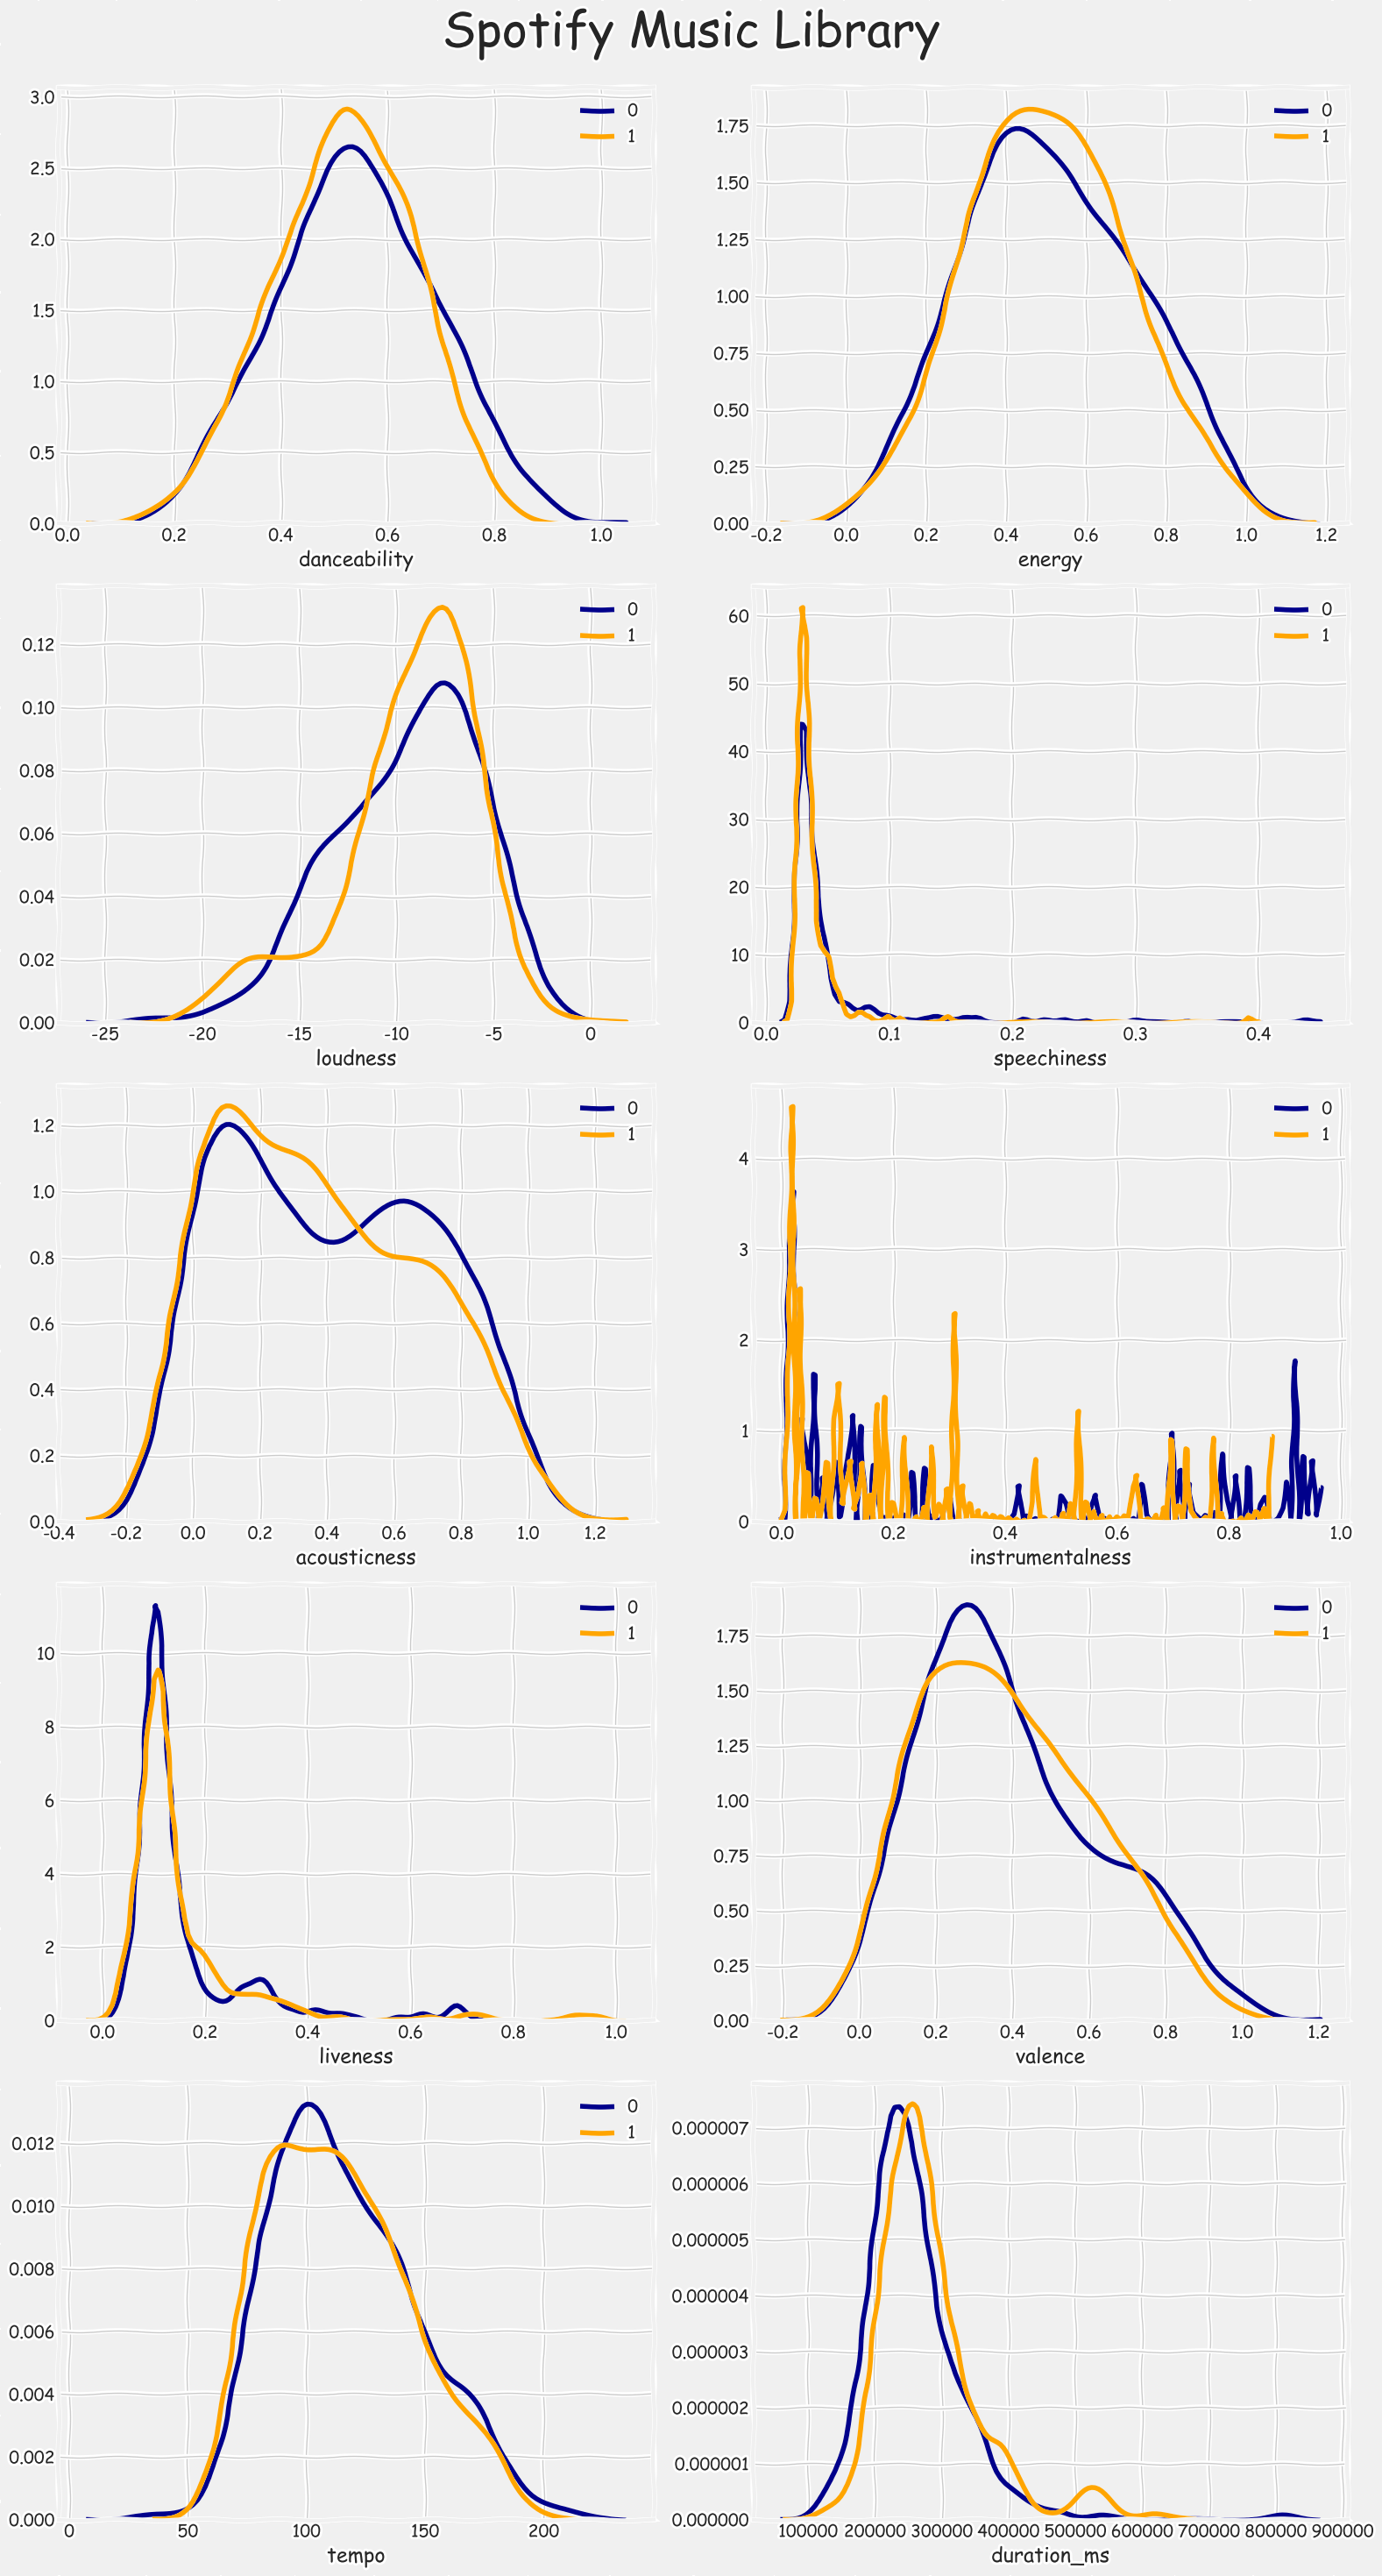

In [37]:
# Density distribution for features for each of the binary label.

plt.xkcd()
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(5,2,figsize = (16, 30))

fig.suptitle('Spotify Music Library',size = 40)

i,j = 0,0

for column,i,j in [('danceability',0,0),('energy',0,1), ('loudness',1,0), ('speechiness',1,1),
       ('acousticness',2,0), ('instrumentalness',2,1), ('liveness',3,0), ('valence',3,1), ('tempo',4,0),
       ('duration_ms',4,1)]:
    
    a = sns.distplot(spotify_df_label[spotify_df_label.Label == 0].loc[:,column], hist = False, label = '0', ax = ax[i,j], color = 'darkblue')
    b = sns.distplot(spotify_df_label[spotify_df_label.Label == 1].loc[:,column], hist = False, label = '1', ax = ax[i,j], color = 'orange')
    plt.legend([a,b],['0','1'])

fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.savefig('kde plots Spotify.JPEG')

In [38]:
# Viewing head
spotify_df_label.rename(columns = {'danceability':'dance', 'speechiness': 'speech', 'instrumentalness':'instrument',
                    'time_signature': 'time_sig'}).head()

dance  energy  key  loudness  mode  speech  \
track_id                                                             
204swkv9veaNPFDuX3Qkyn  0.743   0.229    6   -15.785     0  0.0503   
50Emj7dvfU5NTCQsS7ECJ7  0.522   0.421    0    -7.976     1  0.0275   
27VqcCXF74iKuPAE7aeiDP  0.759   0.665    4    -5.390     1  0.0267   
3xglYoGeL5l9oSt2HWEzrX  0.546   0.263   11    -9.372     1  0.0317   
3qbToOWJKKc0HtruELjlE1  0.394   0.198    1   -12.562     1  0.0408   

                        acousticness  instrument  liveness  valence    tempo  \
track_id                                                                       
204swkv9veaNPFDuX3Qkyn         0.656    0.052300    0.1100   0.4720  141.956   
50Emj7dvfU5NTCQsS7ECJ7         0.730    0.000082    0.1900   0.2030  107.926   
27VqcCXF74iKuPAE7aeiDP         0.766    0.000010    0.0952   0.5470  104.982   
3xglYoGeL5l9oSt2HWEzrX         0.738    0.002330    0.1300   0.1870  135.978   
3qbToOWJKKc0HtruELjlE1         0.916    0.001620    0.1150   0.0867  136.208   

                        duration_ms  time_sig  Label  
track_id                                              
204swkv9veaNPFDuX3Qkyn       240845         4    0.0  
50Emj7dvfU5NTCQsS7ECJ7       325822         4    1.0  
27VqcCXF74iKuPAE7aeiDP       269983         1    0.0  
3xglYoGeL5l9oSt2HWEzrX       218224         4    0.0  
3qbToOWJKKc0HtruELjlE1       233760         3    0.0

In [39]:
# Dropping 'time_signature'
spotify_df_label.drop('time_signature',1,inplace = True)

In [40]:
#Scaling all the features

scaler = StandardScaler()

spotify_df_label.iloc[:,:-1] = scaler.fit_transform(spotify_df_label.iloc[:,:-1])

In [41]:
# Viewing head

spotify_df_label.rename(columns = {'danceability':'dance', 'speechiness': 'speech', 'instrumentalness':'instrument',
                    'time_signature': 'time_sig'}).head()

dance    energy       key  loudness      mode  \
track_id                                                                   
204swkv9veaNPFDuX3Qkyn  1.523720 -1.392138  0.264096 -1.780610 -2.103310   
50Emj7dvfU5NTCQsS7ECJ7 -0.078499 -0.439634 -1.443685  0.394375  0.475441   
27VqcCXF74iKuPAE7aeiDP  1.639717  0.770839 -0.305165  1.114635  0.475441   
3xglYoGeL5l9oSt2HWEzrX  0.095498 -1.223466  1.687247  0.005557  0.475441   
3qbToOWJKKc0HtruELjlE1 -1.006481 -1.545928 -1.159055 -0.882931  0.475441   

                          speech  acousticness  instrument  liveness  \
track_id                                                               
204swkv9veaNPFDuX3Qkyn  0.127058      0.885099   -0.008153 -0.363053   
50Emj7dvfU5NTCQsS7ECJ7 -0.421751      1.138855   -0.298495  0.279869   
27VqcCXF74iKuPAE7aeiDP -0.441008      1.262304   -0.298891 -0.481993   
3xglYoGeL5l9oSt2HWEzrX -0.320655      1.166288   -0.285993 -0.202322   
3qbToOWJKKc0HtruELjlE1 -0.101613      1.776676   -0.289941 -0.322870   

                         valence     tempo  duration_ms  Label  
track_id                                                        
204swkv9veaNPFDuX3Qkyn  0.361998  0.898133    -0.347910    0.0  
50Emj7dvfU5NTCQsS7ECJ7 -0.853516 -0.259691     0.804072    1.0  
27VqcCXF74iKuPAE7aeiDP  0.700896 -0.359856     0.047096    0.0  
3xglYoGeL5l9oSt2HWEzrX -0.925814  0.694740    -0.654569    0.0  
3qbToOWJKKc0HtruELjlE1 -1.379034  0.702565    -0.443957    0.0

In [42]:
# Assigning Feature and Label datasets

X = spotify_df_label.drop('Label',1)
y = spotify_df_label['Label']

# Splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, stratify = y)


In [43]:
# Intiating dataframe to record metric for different classifiers

performance_spotify = pd.DataFrame(columns = ['Sampling Type', 'Classifier','Accuracy','Confusion Matrix','Precision','Recall',
                                            'F1 Score','ROC AUC Score'])

In [44]:
performance_spotify['Classifier'] = ['LogReg','SVC','KNN','Random Forest','GaussianNB','XGBClassifier']*2
performance_spotify['Sampling Type'] = ['Original']*6 + ['SMOTE']*6

In [45]:
# Running different classifiers and compiling into 'performance_spotify'

models = [LogisticRegression(random_state = 0), SVC(random_state = 0), KNeighborsClassifier(),
          RandomForestClassifier(random_state = 0),GaussianNB(), XGBClassifier(random_state = 0)]
i = 0
for model in models:
    clf = model
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    performance_spotify.loc[i,'Accuracy'] = accuracy_score(y_test, pred)
    performance_spotify.loc[i,'Confusion Matrix'] = confusion_matrix(y_test, pred)
    performance_spotify.loc[i,'Precision'] = precision_score(y_test, pred)
    performance_spotify.loc[i,'Recall'] = recall_score(y_test, pred)
    performance_spotify.loc[i,'F1 Score'] = f1_score(y_test, pred)
    performance_spotify.loc[i,'ROC AUC Score'] = roc_auc_score(y_test, pred)
    
    i = i + 1

In [46]:
performance_spotify

Sampling Type     Classifier Accuracy      Confusion Matrix Precision  \
0       Original         LogReg      0.6   [[52, 11], [29, 8]]  0.421053   
1       Original            SVC     0.58    [[55, 8], [34, 3]]  0.272727   
2       Original            KNN     0.47   [[40, 23], [30, 7]]  0.233333   
3       Original  Random Forest     0.54   [[46, 17], [29, 8]]      0.32   
4       Original     GaussianNB     0.46  [[28, 35], [19, 18]]  0.339623   
5       Original  XGBClassifier     0.55  [[43, 20], [25, 12]]     0.375   
6          SMOTE         LogReg      NaN                   NaN       NaN   
7          SMOTE            SVC      NaN                   NaN       NaN   
8          SMOTE            KNN      NaN                   NaN       NaN   
9          SMOTE  Random Forest      NaN                   NaN       NaN   
10         SMOTE     GaussianNB      NaN                   NaN       NaN   
11         SMOTE  XGBClassifier      NaN                   NaN       NaN   

       Recall  F1 Score ROC AUC Score  
0    0.216216  0.285714      0.520807  
1   0.0810811     0.125      0.477048  
2    0.189189  0.208955      0.412055  
3    0.216216  0.258065      0.473187  
4    0.486486       0.4      0.465465  
5    0.324324  0.347826      0.503432  
6         NaN       NaN           NaN  
7         NaN       NaN           NaN  
8         NaN       NaN           NaN  
9         NaN       NaN           NaN  
10        NaN       NaN           NaN  
11        NaN       NaN           NaN

# SMOTE

In [47]:
smote = SMOTE(random_state = 0)

# Sampling data using SMOTE
X_sample, y_sample = smote.fit_sample(X_train, y_train)

In [48]:
X_sample.head()

danceability    energy       key  loudness      mode  speechiness  \
0     -0.208996  0.800605 -0.589795  1.002669  0.475441    -0.431379   
1     -0.817984  1.252052 -0.874425  0.321680 -2.103310    -0.339911   
2      0.341993 -0.057641 -1.159055  0.693787  0.475441    -0.416937   
3     -0.426492 -1.223466  0.833356 -0.359865  0.475441    -0.274921   
4      1.770215  0.582323  0.548726  0.905186  0.475441     0.822697   

   acousticness  instrumentalness  liveness   valence     tempo  duration_ms  
0     -1.246799         -0.298948  1.236215  0.249032 -0.326683     1.635729  
1     -0.723169         -0.293277 -0.799436  2.101675  3.035938    -0.021906  
2     -0.685448         -0.298948 -0.186249 -1.269231  0.024236    -0.815402  
3      1.653227         -0.298701 -0.258578  0.298737  1.807482     0.575660  
4     -0.143644         -0.298948 -0.478779  0.235476 -0.527524    -0.705324

In [49]:
# Running different classifiers on over sampled data and compiling into 'performance_spotify'

i = 6
for model in models:
    clf = model
    clf.fit(X_sample, y_sample)
    pred = clf.predict(X_test)
    performance_spotify.loc[i,'Accuracy'] = accuracy_score(y_test, pred)
    performance_spotify.loc[i,'Confusion Matrix'] = confusion_matrix(y_test, pred)
    performance_spotify.loc[i,'Precision'] = precision_score(y_test, pred)
    performance_spotify.loc[i,'Recall'] = recall_score(y_test, pred)
    performance_spotify.loc[i,'F1 Score'] = f1_score(y_test, pred)
    performance_spotify.loc[i,'ROC AUC Score'] = roc_auc_score(y_test, pred)
    
    i = i + 1

In [50]:
performance_spotify

Sampling Type     Classifier Accuracy      Confusion Matrix Precision  \
0       Original         LogReg      0.6   [[52, 11], [29, 8]]  0.421053   
1       Original            SVC     0.58    [[55, 8], [34, 3]]  0.272727   
2       Original            KNN     0.47   [[40, 23], [30, 7]]  0.233333   
3       Original  Random Forest     0.54   [[46, 17], [29, 8]]      0.32   
4       Original     GaussianNB     0.46  [[28, 35], [19, 18]]  0.339623   
5       Original  XGBClassifier     0.55  [[43, 20], [25, 12]]     0.375   
6          SMOTE         LogReg     0.52  [[34, 29], [19, 18]]  0.382979   
7          SMOTE            SVC      0.5  [[33, 30], [20, 17]]  0.361702   
8          SMOTE            KNN     0.42  [[26, 37], [21, 16]]  0.301887   
9          SMOTE  Random Forest     0.54  [[41, 22], [24, 13]]  0.371429   
10         SMOTE     GaussianNB     0.44  [[19, 44], [12, 25]]  0.362319   
11         SMOTE  XGBClassifier      0.5  [[36, 27], [23, 14]]  0.341463   

       Recall  F1 Score ROC AUC Score  
0    0.216216  0.285714      0.520807  
1   0.0810811     0.125      0.477048  
2    0.189189  0.208955      0.412055  
3    0.216216  0.258065      0.473187  
4    0.486486       0.4      0.465465  
5    0.324324  0.347826      0.503432  
6    0.486486  0.428571      0.513085  
7    0.459459  0.404762      0.491634  
8    0.432432  0.355556      0.422565  
9    0.351351  0.361111      0.501073  
10   0.675676  0.471698      0.488631  
11   0.378378  0.358974      0.474903

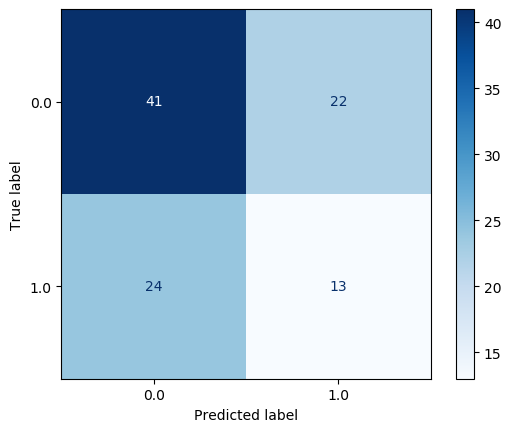

In [51]:
# Confusion Matrix of Random Forest Classifier

plt.rcdefaults()
clf_rfc = RandomForestClassifier(random_state = 0)
clf_rfc.fit(X_sample, y_sample)

plot_confusion_matrix(clf_rfc, X_test, y_test, cmap=plt.cm.Blues)

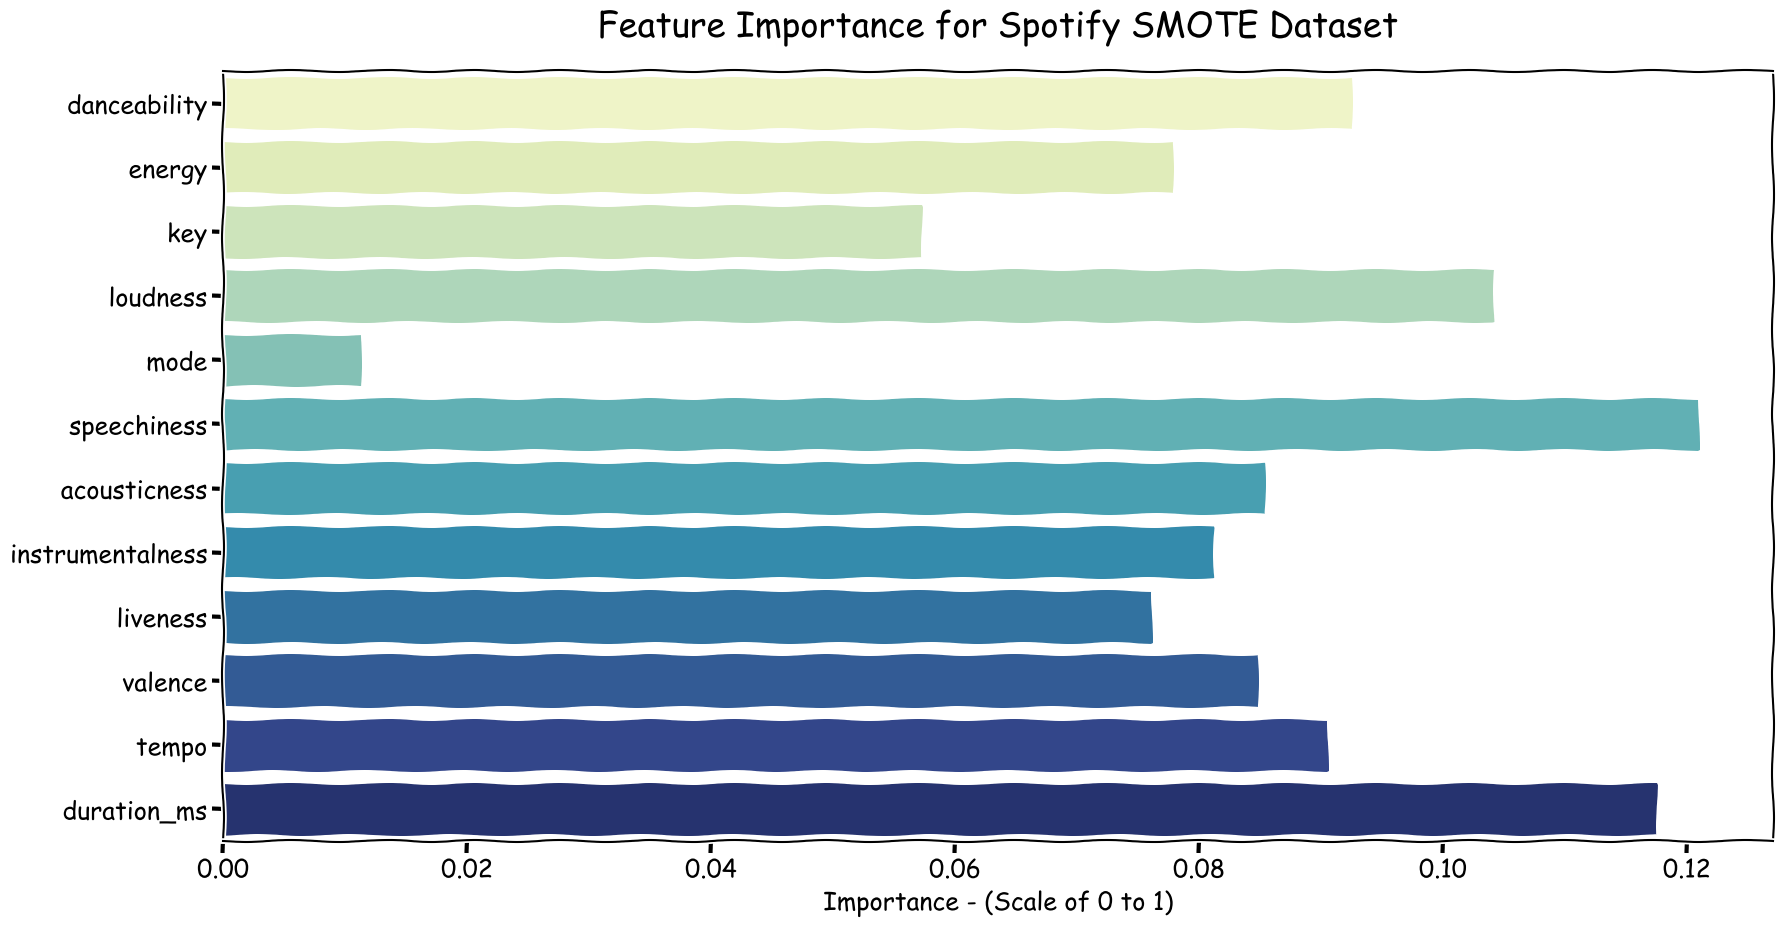

In [52]:
#Feature Importances

plt.rcdefaults()
plt.xkcd()
clf = RandomForestClassifier()
clf.fit(X_sample, y_sample)

plt.figure(figsize = (20,10))
sns.barplot(y = X_train.columns, x = clf.feature_importances_, palette = 'YlGnBu')
plt.xlabel('Importance - (Scale of 0 to 1)', size = 18)
plt.title('Feature Importance for Spotify SMOTE Dataset', pad = 25,size = 25)
plt.yticks(size = 18)
plt.xticks(size = 18)
plt.savefig('feature importance_spotify.JPEG')

In [53]:
# Intiating dataframe to record threshold data for different classifiers

performance_spotify_threshold = pd.DataFrame(columns = ['Classifier','Best Threshold', 'Confusion Matrix',
                                                      'Precision Score','F1 Score', 'ROC AUC Score'])

performance_spotify_threshold['Classifier'] = ['LogReg','KNN','Random Forest','XGBoost']

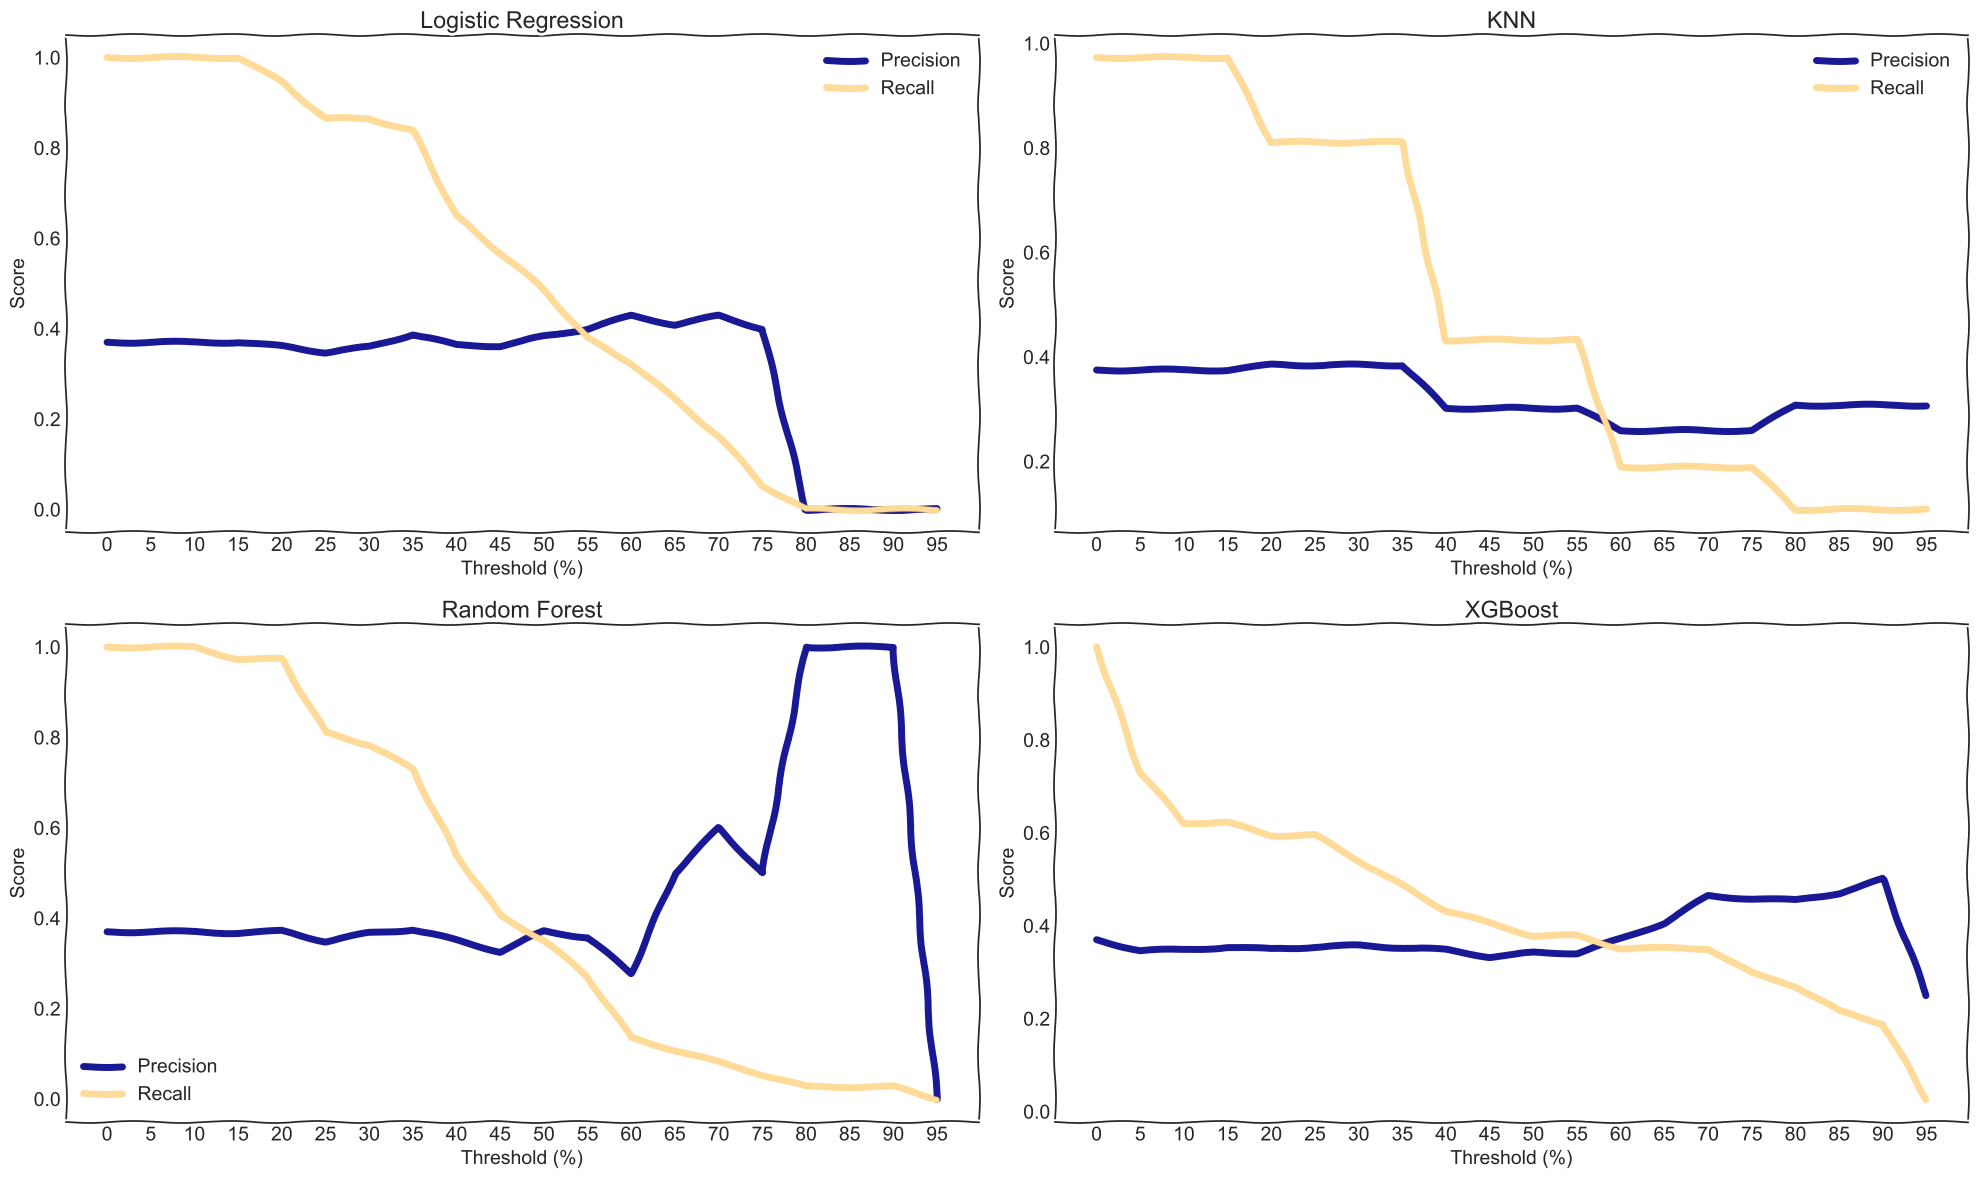

In [54]:
# 1. Plotting precision and recall for different thresholds for different classifiers
# 2. Compiling all the into into 'performance_spotify_threshold'

plt.xkcd()
plt.style.use('seaborn-white')

i = 0

fig, ax = plt.subplots(2,2,figsize = (20,12))

for (model,ax1,ax2) in [ (LogisticRegression(random_state = 0),0,0), (KNeighborsClassifier(),0,1), 
              (RandomForestClassifier(random_state = 0),1,0), (XGBClassifier(random_state = 0),1,1)]:
    
    model_names = ['Logistic Regression', 'KNN', 'Random Forest', 'XGBoost']
    
    clf = model
    clf.fit(X_sample, y_sample)
    
    pred_proba_smote = clf.predict_proba(X_test)

    best_precision = precision_score(y_test, clf.predict(X_test))
    best_threshold = 0.5
    
    precision_list = []
    recall_list = []
    
    for threshold in (np.array(range(0, 100, 5))/100):
        precision = precision_score(y_test, (pred_proba_smote[:,1] > threshold).astype(int))
        precision_list.append(precision)
        recall_list.append(recall_score(y_test, (pred_proba_smote[:,1] > threshold).astype(int)))
        if precision > best_precision:
            best_precision = precision
            best_threshold = threshold
            
    a = sns.lineplot(x = range(0, 100, 5), y = precision_list, ax = ax[ax1,ax2], label = 'Precision',
                     lw = 5, color = 'darkblue', alpha = 0.9)
    b = sns.lineplot(x = range(0, 100, 5), y = recall_list, ax = ax[ax1,ax2], label = 'Recall',
                     lw = 5, color = 'orange', alpha = 0.4)
    
    
    ax[ax1,ax2].set_xlabel('Threshold (%)')
    ax[ax1,ax2].set_ylabel('Score')
    
    ax[ax1,ax2].set_xticks(range(0, 100, 5))
    ax[ax1,ax2].set_title(model_names[i], pad = 5)
    
    plt.legend([a,b],['Precision','Recall'])
    
    performance_spotify_threshold.loc[i,'Best Threshold'] = best_threshold
    performance_spotify_threshold.loc[i,'Confusion Matrix'] = confusion_matrix(y_test, (pred_proba_smote[:,1] > best_threshold).astype(int))
    performance_spotify_threshold.loc[i,'Precision Score'] = best_precision
    performance_spotify_threshold.loc[i,'F1 Score'] = f1_score(y_test, (pred_proba_smote[:,1] > best_threshold).astype(int))
    performance_spotify_threshold.loc[i,'ROC AUC Score'] = roc_auc_score(y_test, (pred_proba_smote[:,1] > best_threshold).astype(int))
    i = i + 1
    
fig.tight_layout()

plt.savefig('Spotify Music Threshold.JPEG')

In [55]:
performance_spotify_threshold

Classifier Best Threshold      Confusion Matrix Precision Score  \
0         LogReg            0.6  [[47, 16], [25, 12]]        0.428571   
1            KNN            0.2   [[15, 48], [7, 30]]        0.384615   
2  Random Forest            0.8    [[63, 0], [36, 1]]               1   
3        XGBoost            0.9    [[56, 7], [30, 7]]             0.5   

    F1 Score ROC AUC Score  
0   0.369231      0.535178  
1   0.521739      0.524453  
2  0.0526316      0.513514  
3    0.27451      0.539039

## Saving the model using Pickle

In [56]:
final_model = RandomForestClassifier(random_state = 0)

final_model.fit(X_train, y_train)

import pickle

with open('final_model','wb') as file:
    pickle.dump(final_model,file)